# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: 6
* Students: Gabor Csordas, Maëlle Le Clainche, Nicolas Fontbonne, Marie Sadler
* Dataset: Flights routes

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np

adjacency =  np.load('adjacency_unweighted.npy'); # the adjacency matrix
n_nodes =  len(adjacency); # the number of nodes in the network
n_edges =  1/2 * np.count_nonzero(adjacency); # the number of edges in the network

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [2]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    adjacency = np.zeros((n,n));
    np.random.seed(seed);
    for i in range(n):
        for j in range(i+1,n):
            if p > np.random.uniform(0,1):
                adjacency[i,j] = 1;
                adjacency[j,i] = 1;
    
    return adjacency

2.4 2.4


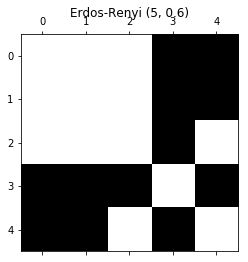

In [4]:
er = erdos_renyi(5, 0.5, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')
print(np.sum(er)/5,0.6*4)

In [6]:
#er = erdos_renyi(10, 0.4, 7648)
size = 10000
p = 0.6
er = erdos_renyi(size, p, 10)
#plt.spy(er)
#plt.title('Erdos-Renyi (10, 0.4)')
print(np.sum(er)/size,p*(size-1))

5997.9392 5999.4


2.4 2.4


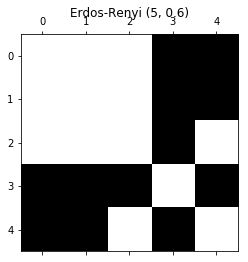

In [5]:
er = erdos_renyi(5, 0.5, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')
print(np.sum(er)/5,0.6*4)

In [7]:
#er = erdos_renyi(10, 0.4, 7648)
size = 10000
p = 0.6
er = erdos_renyi(size, p, 10)
#plt.spy(er)
#plt.title('Erdos-Renyi (10, 0.4)')
print(np.sum(er)/size,p*(size-1))

5997.9392 5999.4


### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [8]:
degree = np.sum(adjacency, axis=0) 
average_degree=np.average(degree)
p=average_degree/(n_nodes-1)
adjacency_erdos=erdos_renyi(n_nodes, p, seed=None)

In [9]:
print('Are the number of nodes of our orginal graph and our Erdos-Renyi graph the same :',n_nodes ==  len(adjacency_erdos));
print('Number of edges of our origianal graph :',n_edges)
print('Number of edges of our Erdos-Renyi graph :',1/2 * np.sum(adjacency_erdos)); 

Are the number of nodes of our orginal graph and our Erdos-Renyi graph the same : True
Number of edges of our origianal graph : 19256.5
Number of edges of our Erdos-Renyi graph : 19208.0


**The expected number of links is equal to p times the maximal number of links, and the average degree is two times the expected number of links divided by the number of nodes. The average degree is equal to p times the maximum number of links for one node.** 

**That's why the probability p is equal to the average degree divided by (the number of nodes minus 1).**

**We see that the number of nodes is the same as our original graph (logical : it is a paramater), and the number of edges are similar.**

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [10]:
def barabasi_albert(n, m, seed=None):

    """Create an instance from the Barabasi-Albert graph model.
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
  Returns
  -------
    adjacency
        The adjacency matrix of a graph.
    """

    random.seed(seed)
    m = math.floor(m)

    if m < 2:
        m0 = 2
    else:
        m0 = m
        
    # Start with a fully connected network if size m
    adjacency = np.zeros([n,n])
    adjacency[0:m0,0:m0] = 1
    for k in range(m0):
        adjacency[k][k] = 0
        
    for node in range(m0,n):
        # While degree is not m
        
        distribution = np.sum(adjacency[0:node,0:node],axis=0)/np.sum(adjacency[0:node,0:node])
    
        connection = np.random.choice(np.arange(0,node), size=m,  p=distribution)

        adjacency[list(connection),node] = 1
        adjacency[node,list(connection)] = 1
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

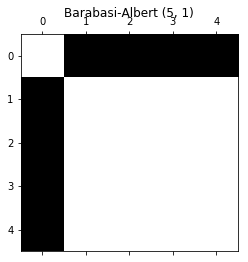

In [11]:
ba = barabasi_albert(5, 1, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

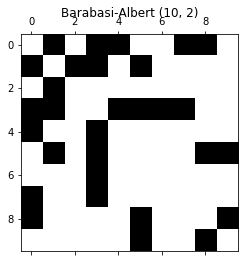

In [12]:
ba = barabasi_albert(10, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [13]:
m=average_degree/2

adjacency_barabasi=barabasi_albert(n_nodes, m, seed=None)

In [14]:
print('Are the number of nodes of our orginal graph and our Barabasi-Albert graph the same :',n_nodes ==  len(adjacency_barabasi));
print('Number of edges of our origianal graph :',n_edges)
print('Number of edges of our Barabasi-Albert graph :',1/2 * np.sum(adjacency_barabasi)); 

Are the number of nodes of our orginal graph and our Barabasi-Albert graph the same : True
Number of edges of our origianal graph : 19256.5
Number of edges of our Barabasi-Albert graph : 17011.0


**The maximum number of edge m is the average degree divided by 2.**

**We see that the number of nodes is the same as our original graph (logical : it is a paramater), and the number of edges are in the same order of magnitude.**

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [15]:
print('Number of edges in our orginal graph :',n_edges)
print('Number of edges in our Erdos-Renyi graph :',1/2 * np.sum(adjacency_erdos))
print('Number of edges in our Barabási-Albert graph :',1/2 * np.sum(adjacency_barabasi))

Number of edges in our orginal graph : 19256.5
Number of edges in our Erdos-Renyi graph : 19208.0
Number of edges in our Barabási-Albert graph : 17011.0


**The Erdos-Renyi graph has a number of edges closer to the original graph, where the Barabasi-Albert graph has slightly less edges.**

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [16]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    #initialization of kl
    kl=0;
    
    #computation of the sum 
    for i in range (0,len(p)): #p and q have the same length
        if p[i]!=0 and q[i]!=0:
                kl+=p[i]*np.log(p[i]/q[i]);
        
    #return the result
    return kl

In [17]:
def kl_divergence_smooth(p, q):
    """Compute the KL divergence in a "smoother" vesion,
    between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    #initialization of kl
    kl=0;
    
    for i in range (1,len(p)-1): #p and q have the same length
        p_mean=(p[i]+p[i-1]+p[i+1])/3 #mean 
        q_mean=(q[i]+q[i-1]+q[i+1])/3 #mean
        if p_mean!=0 and q_mean!=0:
            kl+=p_mean*np.log(p_mean/q_mean);
        
    #return the result
    return kl

In [18]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
print('Our KL divergence result :',kl_divergence(p_test, q_test))

from scipy.stats import entropy #just for checking
print('Is our KL divergence the same as Scipy entropy ?', entropy(p_test,q_test)==kl_divergence(p_test, q_test))

print()
print('Our KL divergence "smooth" result :',kl_divergence_smooth(p_test, q_test))
print('-> The result is different because we use bins to avoid the "zeros" issues')

Our KL divergence result : 0.09151622184943575
Is our KL divergence the same as Scipy entropy ? True

Our KL divergence "smooth" result : 0.004778235401087804
-> The result is different because we use bins to avoid the "zeros" issues


### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [19]:
def compute_degree_distribution(degree,size):
    #reurn the degree distribution of size 'size' from the list of each node degree 'degree'
    maxi=max(degree)
    if maxi>size+1:
        return('The maximal degree is superior to the size of degree distribution desired')
    else:
        degree_distribution=np.zeros(size+1)
        for node_degree in degree: #for each node we look the degree
            degree_distribution[node_degree]+=1
        degree_distribution=degree_distribution/np.sum(degree_distribution)
        return(degree_distribution)

In [20]:
degree_real=np.sum(adjacency, axis=0)
degree_Erdos=np.sum(adjacency_erdos, axis=0, dtype=np.int32)
degree_Barabasi=np.sum(adjacency_barabasi, axis=0, dtype=np.int32)

maximum=max(max(degree_real),max(degree_Erdos),max(degree_Barabasi))

degree_distribution_real=compute_degree_distribution(degree_real,maximum)
degree_distribution_Erdos=compute_degree_distribution(degree_Erdos,maximum)
degree_distribution_Barabasi=compute_degree_distribution(degree_Barabasi,maximum)

#Check probability distribution
print('Real network - Sum of probability = ',np.sum(degree_distribution_real))
print('Erdos-Renyi network - Sum of probability = ',np.sum(degree_distribution_Erdos))
print('Barabasi-Albert network - Sum of probability = ',np.sum(degree_distribution_Barabasi))

Real network - Sum of probability =  0.9999999999999998
Erdos-Renyi network - Sum of probability =  1.0
Barabasi-Albert network - Sum of probability =  0.9999999999999999


In [29]:
#Comparaison of KL divergences
print('KL divergence between real and Barabasi-Albert network : ',
     kl_divergence(degree_distribution_real, degree_distribution_Barabasi))
print('KL divergence between real and Erdos-Renyi network : ',
      kl_divergence(degree_distribution_real, degree_distribution_Erdos))

KL divergence between real and Barabasi-Albert network :  -0.03067822190348142
KL divergence between real and Erdos-Renyi network :  1.5125824232179925


**The "classical" KL divergence is not adapted to our degree distribution, because it exists some p(i)!=0 when q(i)=0.
In the"classical" definition of KL divergence, it should not be any p(i)!=0 when q(i)=0 (absolute continuity).**

**This explain why we have some values that have no sense (KL divegrence<0) : we will use the KL distribution "smoother" for our networks.**

In [30]:
n=len(degree_distribution_real)
c=0
for i in range(0,n):
    if degree_distribution_real[i]==0:
        c=c+1
print('Number of 0 in degree distribution of our original graph :',c)


n=len(degree_distribution_Erdos)
c=0
for i in range(0,n):
    if degree_distribution_Erdos[i]==0:
        c=c+1
print('Number of 0 in degree distribution of Erdos graph :',c)

n=len(degree_distribution_Barabasi)
c=0
for i in range(0,n):
    if degree_distribution_Barabasi[i]==0:
        c=c+1
print('Number of 0 in degree distribution of Barabasi graph :',c)

print('-> We need to adapt our KL divergence because we have a lot of zeros in the distibutions.')

Number of 0 in degree distribution of our original graph : 143
Number of 0 in degree distribution of Erdos graph : 264
Number of 0 in degree distribution of Barabasi graph : 208
-> We need to adapt our KL divergence because we have a lot of zeros in the distibutions.


In [31]:
#Comparaison of KL divergences "smooth"
print('KL divergence "smooth" between real and Barabasi-Albert network : ',
     kl_divergence_smooth(degree_distribution_real, degree_distribution_Barabasi))
print('KL divergence "smooth" between real and Erdos-Renyi network : ',
      kl_divergence_smooth(degree_distribution_real, degree_distribution_Erdos))

KL divergence "smooth" between real and Barabasi-Albert network :  0.4133586445849011
KL divergence "smooth" between real and Erdos-Renyi network :  2.20786880853054


**The KL divergence between our original network and the Barabasi-Albert is  much more closer to 0 than the KL divegrence between our orginal network and the Erdos-Renyi.**

**Knowing that two identical network will have a KL divergence of 0, we can conclude that the Barabasi-Albert network is much more closer to our original network than the Erdos-Renyi is.**

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

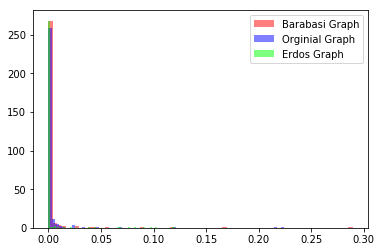

In [32]:
plt.hist(degree_distribution_Barabasi, bins = 70, fc=(1, 0, 0, 0.5), label='Barabasi Graph');
plt.hist(degree_distribution_real, bins = 70, fc=(0, 0, 1, 0.5), label='Orginial Graph');
plt.hist(degree_distribution_Erdos, bins = 70, fc=(0, 1, 0, 0.5),  label='Erdos Graph');
plt.legend()

**The observation of the histogramm lead to the same conclusion as the KL divergence on Q7 : the degree distribution in our network is closer to the Barabasi-Albert model, than the Erdős–Rényi model.**

**The Erdős–Rényi model is binomial, which means that for large N, a Poisson distribution is achieved. However, since the flight route network has a degree distribution which is not evenly distributed around the average degree, but which has a more heterogeneous distribution with some very large hubs, the Erdős–Rényi model is not a good choice.**

**The Barabási-Albert model on the other hand, generates a scale-free network. The mechanism of preferential attachment implies that very large hubs appear, just as in a real-world flight route network.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.


**The degree distribution captures only a small amount of the network structure, as it ignores how the nodes are connected to each other.**

**So, two equal degree distributions do not garantee to get the same graph.**

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [34]:
import networkx as nx

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Our network is well fitted by a network following a power law (Scale-Free Network): there are many nodes with only a few links, and a few hubs with large number of links.**

**To create the random scale-free network, we first generate a power law sequence to model the degree distribution. Then, we apply the model of Chung and Lu which generates a random graph given a sequence of expected degrees. An important difference of the Chung-Lu.**

### Question 11

Explain (in short) how the chosen model works.

**In a scale-free network, the degree distribution follows a power law distribution $p_k$ of the following form: $p_k \sim\ k^{-\gamma}$, where k is the degree and $\gamma$ is the degree exponent. The degree of the biggest hub follows the expression:**

**\begin{equation}
    k_{max} = k_{min} N ^{\frac{1}{\gamma -1}}
\end{equation}        
where $k_{min}$ and $k_{max}$ are the smallest and biggest nodes, respectively.**

**With the $\lambda$ parameter we generate a powerlaw sequence to model the degree distribution. Each node then has a weight $w_u$ assigned to it and we can define the average weight as follows:**

**\begin{equation}
    \bar{w} = \sum\nolimits_{u} \frac{w_u}{N}.
\end{equation}**


**In the Chung-Lu model, two nodes u and v with weights $w_u$ and $w_v$ are connected by an edge with probability:**

**\begin{equation}
p_{u,v} = \frac{w_u \cdot w_v}{N \cdot \bar{w}}
\end{equation}**

**The expecte degree of a node $u$ is:
\begin{equation}
\sum\nolimits_{v \neq u} \frac{w_u \cdot w_v}{N \cdot \bar{w}} = w_u - \frac{w_u^2}{N \cdot \bar{w}}
\end{equation}
which for a large number of nodes converges to $w_u$.**

*Reference*: Joel Miller and Aric Hagberg, Efficient generation of networks with given expected degrees, in Algorithms and Models for the Web-Graph (WAW 2011), Alan Frieze, Paul Horn, and Paweł Prałat (Eds), LNCS 6732, pp. 115-126, 2011.


### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [35]:
sequence = nx.utils.powerlaw_sequence(n_nodes, 2) # generates power law sequence with gamma = 2
G_scale_free = nx.expected_degree_graph(sequence, selfloops=False) # generates the graph
G_scale_free.name = 'Scale Free Graph'

### Question 13

Check the properties you expected to be similar, and compare to your network.

Name: Real Graph
Type: Graph
Number of nodes: 3425
Number of edges: 19257
Average degree:  11.2450
Maximum degree: 248
Density: 0.0032841599017668327

Name: Scale Free Graph
Type: Graph
Number of nodes: 3425
Number of edges: 8640
Average degree:   5.0453
Maximum degree: 2654
Density: 0.001473497510062078


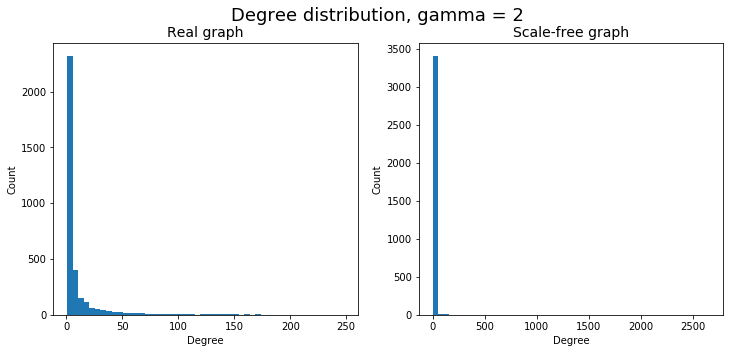

In [36]:
#Creation of our real network, thanks to adjacency matrix
G_real = nx.from_numpy_array(adjacency)
G_real.name = 'Real Graph'

#derive degree sequences
degree_sequence_real=sorted([v for k, v in nx.degree(G_real)],reverse=True) 
degree_sequence_random=sorted([v for k, v in nx.degree(G_scale_free)],reverse=True) 

#Comparaison of graphs properties
print(nx.info(G_real))
print("Maximum degree: " + str(max(degree_sequence_real)) +"\nDensity: " + str(nx.density(G_real)))
print()
print(nx.info(G_scale_free))
print("Maximum degree: " + str(max(degree_sequence_random)) +"\nDensity: " + str(nx.density(G_scale_free)))

fig, ax= plt.subplots(1,2, figsize=(12,5))
ax[0].hist(degree_sequence_real, bins = 50)
ax[1].hist(degree_sequence_random, bins = 50)


ax[0].set_title('Real graph', fontsize = 14)
ax[1].set_title('Scale-free graph', fontsize = 14)
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Count')
plt.suptitle('Degree distribution, gamma = 2', fontsize = 18)

plt.show()

Are the results what you expected? Explain.

**The results change as expected according to the parameter $\\gamma$. When $\\gamma$ equals 2, the degree distribution has a very steep decay and as a result a very large hub is observed ($k_{max}$ ~ 2600-2800), which is more connected than the largest hub in the real network. At the same time, a lot of nodes are poorly connected, which leads to an average degree and a density lower than in the real network.**

**We could have chosen a higher  $\\gamma$, e.g. 2.5. In that case, the decay is less steep and $k_{max}$ in the random generated graph approaches $k_{max}$ in the real graph. However, the random network is then even less densily connected which again does not well fit the real graph.**

**We conclude that the random generated graph from the Chung-Lu model given a powerlaw distribution does not fit our network as good as the Barabasi-Albert model. The BA model guarantees at the same time a similar number of edges than our real network, while also having a degree distribution that decays in a similar fashion.**